<a href="https://colab.research.google.com/github/estebanvz/alura/blob/clase04/Clase04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de librerias

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Cargando el dataset 

In [2]:
dataset = keras.datasets.fashion_mnist
(( imagenes_entrenamiento, etiquetas_entrenamiento ),(imagenes_test, etiquetas_test)) =dataset.load_data()

4431872/4422102 [==============================] - 0s 0us/step


# Exploración de datos

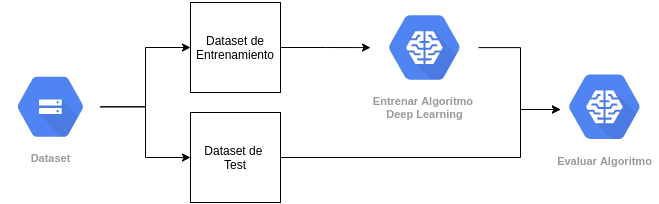

In [3]:
def mostrar_estructura(imagenes,etiquetas,titulo):
  print("--> ",titulo)
  print(
      "Cantidad de imágenes: {} \nCantidad de etiquetas: {} \nEstructura de las imágenes: {}\nEtiquetas: {}"
      .format(imagenes.shape[0],etiquetas.shape[0],imagenes.shape[1:],list(set(etiquetas)))
  )

In [4]:
mostrar_estructura(imagenes_entrenamiento,etiquetas_entrenamiento,"Dataset de entrenamiento")

-->  Dataset de entrenamiento
Cantidad de imágenes: 60000 
Cantidad de etiquetas: 60000 
Estructura de las imágenes: (28, 28)
Etiquetas: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [5]:
mostrar_estructura(imagenes_test,etiquetas_test,"Dataset de test")

-->  Dataset de test
Cantidad de imágenes: 10000 
Cantidad de etiquetas: 10000 
Estructura de las imágenes: (28, 28)
Etiquetas: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


# Descripción de las etiquetas
[Github fashion mnist](https://github.com/zalandoresearch/fashion-mnist)

Etiquetas (labels):
* 0 T-shirt/top -> camisa
* 1 Trouser -> pantalón
* 2 Pullover -> suéter
* 3 Dress -> vestido
* 4 Coat -> saco
* 5 Sandal -> sandalia
* 6 Shirt -> camisa
* 7 Sneaker -> zapatilla
* 8 Bag -> bolsa
* 9 Ankle boot -> bota

# Visualización de datos

In [6]:
etiquetas = ["camisa","pantalón","suéter","vestido","saco","sandalia","camisa","zapatilla","bolsa","bota",]

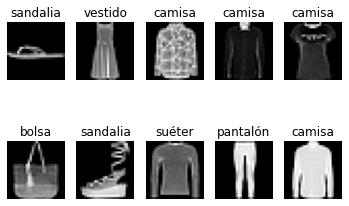

In [7]:
for index in range(10):
  plt.subplot( 2, 5, index + 1 )
  plt.axis("off")
  plt.title( etiquetas[etiquetas_entrenamiento[index+30]])
  plt.imshow(imagenes_entrenamiento[index+30],cmap="gray")

# Redes Neuronales (Machine Learning Clásico)

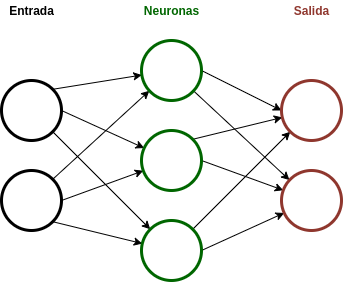

In [8]:
imagenes_entrenamiento.shape

(60000, 28, 28)

In [18]:
imagenes_entrenamiento_flat = imagenes_entrenamiento.reshape( (60000, 28 * 28) )
imagenes_entrenamiento_flat.shape

(60000, 784)

In [19]:
red_neuronal = keras.Sequential([
  keras.layers.Dense(50, activation="relu" , input_shape=(784,) ),
  keras.layers.Dense(10, activation="softmax" ),
])
red_neuronal.compile( loss = "sparse_categorical_crossentropy", metrics="accuracy" )

In [20]:
red_neuronal.fit( imagenes_entrenamiento_flat, etiquetas_entrenamiento,epochs=5, batch_size=1000 )

Epoch 1/5
60/60 [==============================] - 1s 10ms/step - loss: 36.6333 - accuracy: 0.5689
Epoch 2/5
60/60 [==============================] - 1s 10ms/step - loss: 6.6810 - accuracy: 0.6482
Epoch 3/5
60/60 [==============================] - 1s 10ms/step - loss: 1.3342 - accuracy: 0.6408
Epoch 4/5
60/60 [==============================] - 1s 10ms/step - loss: 1.0477 - accuracy: 0.6861
Epoch 5/5
60/60 [==============================] - 1s 10ms/step - loss: 0.8797 - accuracy: 0.7039


#Deep Learning

## MLP
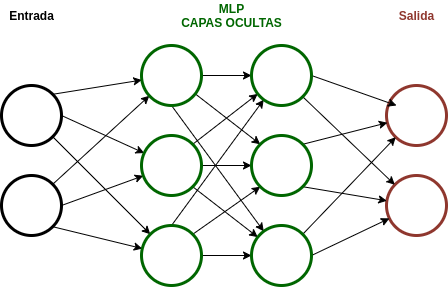

In [23]:
mlp = keras.Sequential([
  keras.layers.Dense(50, activation="relu" , input_shape=(784,) ),
  keras.layers.Dense(50, activation="softmax" ),
  keras.layers.Dense(10, activation="softmax" ),
])
mlp.compile( loss = "sparse_categorical_crossentropy", metrics="accuracy" )

In [24]:
mlp.fit( imagenes_entrenamiento_flat, etiquetas_entrenamiento,epochs=5, batch_size=1000 )

Epoch 1/5
60/60 [==============================] - 1s 12ms/step - loss: 2.1458 - accuracy: 0.4017
Epoch 2/5
60/60 [==============================] - 1s 12ms/step - loss: 2.0584 - accuracy: 0.4625
Epoch 3/5
60/60 [==============================] - 1s 12ms/step - loss: 1.9938 - accuracy: 0.4554
Epoch 4/5
60/60 [==============================] - 1s 12ms/step - loss: 1.9223 - accuracy: 0.4742
Epoch 5/5
60/60 [==============================] - 1s 12ms/step - loss: 1.8622 - accuracy: 0.4820


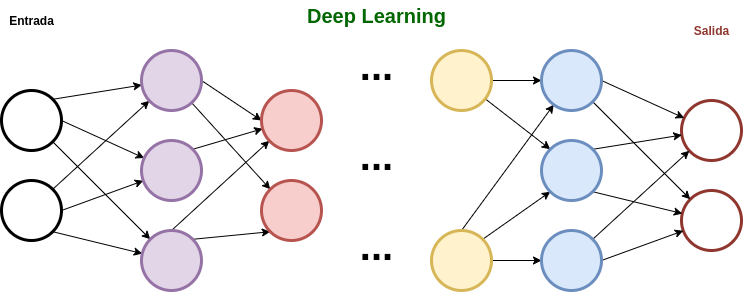

In [50]:
dl =  keras.Sequential([
  keras.layers.Reshape( (28*28,), input_shape=(28,28,)   ),
  keras.layers.Dense(24, activation="relu"),
  keras.layers.Dense(10, activation="softmax"),
])
dl.compile( loss="sparse_categorical_crossentropy", metrics="accuracy" )

In [51]:
logs = dl.fit( 
    imagenes_entrenamiento,
    etiquetas_entrenamiento,
    epochs=30,
    batch_size=1000,
    validation_split=0.3
    )

Epoch 1/30
42/42 [==============================] - 1s 15ms/step - loss: 16.7064 - accuracy: 0.4183 - val_loss: 2.4170 - val_accuracy: 0.3932
Epoch 2/30
42/42 [==============================] - 0s 11ms/step - loss: 1.9269 - accuracy: 0.4059 - val_loss: 1.6057 - val_accuracy: 0.4474
Epoch 3/30
42/42 [==============================] - 1s 12ms/step - loss: 1.5065 - accuracy: 0.5033 - val_loss: 1.3588 - val_accuracy: 0.5448
Epoch 4/30
42/42 [==============================] - 0s 11ms/step - loss: 1.3058 - accuracy: 0.5692 - val_loss: 1.2685 - val_accuracy: 0.5923
Epoch 5/30
42/42 [==============================] - 0s 10ms/step - loss: 1.1807 - accuracy: 0.6045 - val_loss: 1.1589 - val_accuracy: 0.6029
Epoch 6/30
42/42 [==============================] - 0s 11ms/step - loss: 1.1047 - accuracy: 0.6235 - val_loss: 1.1161 - val_accuracy: 0.6234
Epoch 7/30
42/42 [==============================] - 0s 10ms/step - loss: 1.0301 - accuracy: 0.6418 - val_loss: 1.0806 - val_accuracy: 0.6561
Epoch 8/30
4

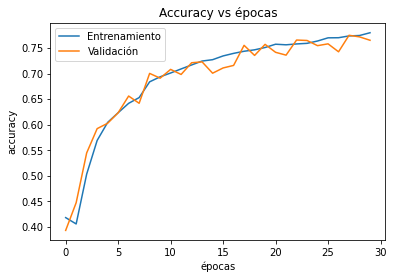

In [52]:
def metrics_graph(logs):
  plt.plot( logs.history['accuracy'] )
  plt.plot( logs.history['val_accuracy'] )
  plt.title("Accuracy vs épocas")
  plt.xlabel("épocas")
  plt.ylabel("accuracy")
  plt.legend(['Entrenamiento',"Validación"])
  plt.draw()
metrics_graph(logs)

In [54]:
dl.evaluate(imagenes_test,etiquetas_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.7968 - accuracy: 0.7542


[0.7968217730522156, 0.7541999816894531]